In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
lastfm = pd.read_csv('Downloads/recenttracks-awebusan-1723633826.csv')

In [5]:
lastfm.head()

,uts,utc_time,artist,artist_mbid,album,album_mbid,track,track_mbid
0,1723633826,"14 Aug 2024, 11:10",Plaza,7e9b4c8e-0dce-4fbf-83eb-1d9e081cdec2,SHADOW,a9597fa2-e66f-48ec-9fca-4f09ea1663eb,Personal,3b864454-61c4-4fe7-a8f0-231ecb359a46
1,1723633618,"14 Aug 2024, 11:06",Mars Argo,4b1e6dd1-490a-4c17-8cfb-3ba993a90c80,Linden Place EP,0362906f-20ed-49fe-9fc7-305fc025062b,Using You,1def37b2-0057-42cd-8b20-254ee3919bed
2,1723633384,"14 Aug 2024, 11:03",Mars Argo,4b1e6dd1-490a-4c17-8cfb-3ba993a90c80,Runaway Runaway,354e1732-8777-4e97-baef-433f19db6102,Runaway Runaway,2998cb43-d172-4cb7-8a0b-075d89dc2f21
3,1723633147,"14 Aug 2024, 10:59",RM & Jungkook,NaN,NaN,NaN,I Know,NaN
4,1723632882,"14 Aug 2024, 10:54",Jimin,NaN,NaN,NaN,Letter (편지) (HIDDEN TRACK FACE ALBUM CD Only),NaN


In [7]:
lastfm.columns

Index(['uts', 'utc_time', 'artist', 'artist_mbid', 'album', 'album_mbid',
       'track', 'track_mbid'],
      dtype='object')

In [983]:
API_KEY = '19531c0d7972f042e9e1573b68340b89'
USER_AGENT = 'FISHNET22'
BASE_URL = 'https://ws.audioscrobbler.com/2.0/'
import requests


In [935]:
lastfm_user = "awebusan"
url = BASE_URL
params = {
        #'method': 'artist.getTopTags',
        'method': 'user.getRecentTracks',
        'limit': 200,
        'user': lastfm_user,
        #'artist' : tracks_df['artist'][0],
        'api_key': API_KEY,
        'format': 'json'
}

response = requests.get(url, params=params)
data = response.json()

#tracks_df[0].getTags

In [937]:
data

{'recenttracks': {'track': [{'artist': {'mbid': '772a0eb3-fe31-4a08-b583-690296f44900',
     '#text': 'Clams Casino'},
    'streamable': '0',
    'image': [{'size': 'small',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/34s/73eb38297e5540c9b84a4fce25594065.png'},
     {'size': 'medium',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/64s/73eb38297e5540c9b84a4fce25594065.png'},
     {'size': 'large',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/174s/73eb38297e5540c9b84a4fce25594065.png'},
     {'size': 'extralarge',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/73eb38297e5540c9b84a4fce25594065.png'}],
    'mbid': '65653633-5af5-42c2-a928-ea5083e5712a',
    'album': {'mbid': '4a4dc6bd-0167-40ae-ad3b-bc3213c42064',
     '#text': 'Instrumentals 2'},
    'name': "I'm God",
    '@attr': {'nowplaying': 'true'},
    'url': 'https://www.last.fm/music/Clams+Casino/_/I%27m+God'},
   {'artist': {'mbid': '772a0eb3-fe31-4a08-b583-690296f44900',
     '#text': 'C

In [939]:
from pandas import json_normalize

In [941]:
#recs = data['name']['artist']
df = json_normalize(data['recenttracks']['track'])

In [943]:
df['date.#text']

0                     NaN
1      30 Aug 2024, 05:55
2      30 Aug 2024, 05:53
3      30 Aug 2024, 05:52
4      30 Aug 2024, 05:48
              ...        
196    20 Aug 2024, 11:15
197    20 Aug 2024, 11:13
198    20 Aug 2024, 11:11
199    20 Aug 2024, 11:10
200    20 Aug 2024, 10:58
Name: date.#text, Length: 201, dtype: object

In [945]:
df

,streamable,image,mbid,name,url,artist.mbid,artist.#text,album.mbid,album.#text,@attr.nowplaying,date.uts,date.#text
0,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",65653633-5af5-42c2-a928-ea5083e5712a,I'm God,https://www.last.fm/music/Clams+Casino/_/I%27m...,772a0eb3-fe31-4a08-b583-690296f44900,Clams Casino,4a4dc6bd-0167-40ae-ad3b-bc3213c42064,Instrumentals 2,true,NaN,NaN
1,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",65653633-5af5-42c2-a928-ea5083e5712a,I'm God,https://www.last.fm/music/Clams+Casino/_/I%27m...,772a0eb3-fe31-4a08-b583-690296f44900,Clams Casino,4a4dc6bd-0167-40ae-ad3b-bc3213c42064,Instrumentals 2,NaN,1724997333,"30 Aug 2024, 05:55"
2,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,No Clarity,https://www.last.fm/music/ICE+SPICE/_/No+Clarity,,ICE SPICE,,,NaN,1724997225,"30 Aug 2024, 05:53"
3,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,doja cat & ayesha erotica // ORIGINAL UPLOAD,https://www.last.fm/music/star+x+juicy/_/doja+...,,star x juicy,,,NaN,1724997120,"30 Aug 2024, 05:52"
4,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,left right pluggnb flip (rxi + wintfye + yunme),https://www.last.fm/music/XG/_/left+right+plug...,,XG,,,NaN,1724996901,"30 Aug 2024, 05:48"
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,need u (may21),https://www.last.fm/music/lvusm/_/need+u+(may21),,lvusm,,,NaN,1724152532,"20 Aug 2024, 11:15"
197,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Smld,https://www.last.fm/music/dieplug/_/Smld,,dieplug,,,NaN,1724152394,"20 Aug 2024, 11:13"
198,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,I'm Ridin' Through NY,https://www.last.fm/music/SwuM/_/I%27m+Ridin%2...,,SwuM,,,NaN,1724152268,"20 Aug 2024, 11:11"
199,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",674d9d04-4ec8-478e-8ec2-80aeba7f5f50,to be all smiles,https://www.last.fm/music/datfootdive/_/to+be+...,,datfootdive,206cc1b5-6793-4088-9f24-bacc1a63d095,Mother,NaN,1724152205,"20 Aug 2024, 11:10"


In [947]:
artist.#text

SyntaxError: invalid syntax (4172572260.py, line 1)

In [949]:
tracks_df_user = df[['artist.#text', 'name']].dropna()

In [951]:
tracks_df_user

,artist.#text,name
0,Clams Casino,I'm God
1,Clams Casino,I'm God
2,ICE SPICE,No Clarity
3,star x juicy,doja cat & ayesha erotica // ORIGINAL UPLOAD
4,XG,left right pluggnb flip (rxi + wintfye + yunme)
...,...,...
196,lvusm,need u (may21)
197,dieplug,Smld
198,SwuM,I'm Ridin' Through NY
199,datfootdive,to be all smiles


In [953]:
tracks_df = lastfm_user[['artist', 'track']].dropna()

TypeError: string indices must be integers, not 'list'

In [955]:
tracks_df_user

,artist.#text,name
0,Clams Casino,I'm God
1,Clams Casino,I'm God
2,ICE SPICE,No Clarity
3,star x juicy,doja cat & ayesha erotica // ORIGINAL UPLOAD
4,XG,left right pluggnb flip (rxi + wintfye + yunme)
...,...,...
196,lvusm,need u (may21)
197,dieplug,Smld
198,SwuM,I'm Ridin' Through NY
199,datfootdive,to be all smiles


In [957]:
tracks_df_user['name'][0]

"I'm God"

In [959]:
genres_list = []
for i in range(100):
    url = BASE_URL
    params = {
            #'method': 'artist.getTopTags',
            'method': 'track.getTopTags',
            'track': tracks_df_user['name'][i],
            'artist': tracks_df_user['artist.#text'][i],
            #'artist' : tracks_df['artist'][0],
            'api_key': '19531c0d7972f042e9e1573b68340b89',
            'format': 'json'
    }
    full_url = f"{url}?{urlencode(params)}"
    print(full_url)  # Print the full URL
    response = requests.get(full_url)
    #response = requests.get(url, params=params)
    #response = requests.get("https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&api_key=19531c0d7972f042e9e1573b68340b89&artist=Katy+Perry&track=California+Gurls+(feat.+Snoop+Dogg)&format=json")
    data = response.json()
    #list.append(json_normalize(data['toptags']['tag']))
    if 'toptags' in data and 'tag' in data['toptags']:
        # Accumulate all tags into a list
        for tag in data['toptags']['tag']:
            genres_list.append(tag)
genres_df = pd.DataFrame(genres_list)

#tracks_df[0].getTags

https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=I%27m+God&artist=Clams+Casino&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=I%27m+God&artist=Clams+Casino&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=No+Clarity&artist=ICE+SPICE&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=doja+cat+%26+ayesha+erotica+%2F%2F+ORIGINAL+UPLOAD&artist=star+x+juicy&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=left+right+pluggnb+flip+%28rxi+%2B+wintfye+%2B+yunme%29&artist=XG&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&track=Corazon+Azul&artist=cbarrgs&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?meth

In [961]:
genres_list

[{'count': 100,
  'name': 'cloud rap',
  'url': 'https://www.last.fm/tag/cloud+rap'},
 {'count': 77,
  'name': 'electronic',
  'url': 'https://www.last.fm/tag/electronic'},
 {'count': 62, 'name': 'chill', 'url': 'https://www.last.fm/tag/chill'},
 {'count': 62,
  'name': 'chillwave',
  'url': 'https://www.last.fm/tag/chillwave'},
 {'count': 39,
  'name': 'instrumental hip hop',
  'url': 'https://www.last.fm/tag/instrumental+hip+hop'},
 {'count': 31,
  'name': 'witch house',
  'url': 'https://www.last.fm/tag/witch+house'},
 {'count': 24, 'name': 'chillout', 'url': 'https://www.last.fm/tag/chillout'},
 {'count': 24,
  'name': 'My electronica',
  'url': 'https://www.last.fm/tag/My+electronica'},
 {'count': 16,
  'name': 'dream pop',
  'url': 'https://www.last.fm/tag/dream+pop'},
 {'count': 16, 'name': '2012', 'url': 'https://www.last.fm/tag/2012'},
 {'count': 16, 'name': 'based', 'url': 'https://www.last.fm/tag/based'},
 {'count': 16,
  'name': 'my other fav',
  'url': 'https://www.last.fm

In [963]:
genre_df = json_normalize(data['toptags']['tag'])

In [965]:
genres_df

,count,name,url
0,100,cloud rap,https://www.last.fm/tag/cloud+rap
1,77,electronic,https://www.last.fm/tag/electronic
2,62,chill,https://www.last.fm/tag/chill
3,62,chillwave,https://www.last.fm/tag/chillwave
4,39,instrumental hip hop,https://www.last.fm/tag/instrumental+hip+hop
...,...,...,...
406,100,Bangtan Boys,https://www.last.fm/tag/Bangtan+Boys
407,100,lost stars,https://www.last.fm/tag/lost+stars
408,100,방탄소년단,https://www.last.fm/tag/%EB%B0%A9%ED%83%84%EC%...
409,100,Jeon Jungkook,https://www.last.fm/tag/+Jeon+Jungkook


In [967]:
genre_df['name']

KeyError: 'name'

In [969]:
for name in genre_df['name']:
    if 'rnb' in name:
        print(True)
print(False)

KeyError: 'name'

In [895]:
import requests
def get_music_genres_from_api():
    response = requests.get('https://api.musicgenres.com/genres')
    return response.json()
known_genres = set(genre_df['name'].lower() for genre in get_music_genres_from_api())
filtered_genres = [tag for tag in lastfm_tags if tag.lower() in known_genres]

KeyboardInterrupt: 

In [564]:
import requests
from bs4 import BeautifulSoup

def get_wikipedia_genres():
    url = 'https://en.wikipedia.org/wiki/List_of_music_genres'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    genres = set()
    
    # Look for <li> elements within <ul> elements to find genre names
    for ul in soup.find_all('ul'):
        for li in ul.find_all('li'):
            genre = li.get_text().strip()
            if genre:
                # Remove newline characters and extra spaces
                genre = ' '.join(genre.split())
                genres.add(genre.lower())

    return genres

# Fetch and clean the list of genres from Wikipedia
known_genres = get_wikipedia_genres()
print(f"Genres found: {known_genres}")


Genres found: {'prehistoric', 'kosmische musik', 'european balkan nordic', 'ragtime cakewalk classic rag folk ragtime honky-tonk piano novelty piano stomp stride piano', 'mandé art music', '1 classical', 'music technology (electric)', 'm-base', 'ambient house', 'japanese court music—gagaku', 'mainstream jazz', 'big beat', 'classification', 'dance music slow dance', 'hindustani classical', 'banda', 'ranchera', 'industrial rock', 'community portal', 'gulf and western', 'chopper', 'chaabi', 'list of country genres', 'balkan folk music', 'lambada zouk-lambada', 'balearic beat', 'nu jazz (jazztronica)', 'ska punk', '1970s', 'industrial and post-industrial electro-industrial dark electro aggrotech electronic body music (ebm) futurepop new beat industrial hip hop industrial metal cyber metal neue deutsche härte industrial rock martial industrial witch house', '2.8 jazz', 'anime song', 'd-beat', 'afro/cosmic music', 'pastorale', 'death industrial', 'shamanic music', 'bhangra', 'electro', 'cari

In [971]:
genre_list = ['acoustic', 'rock', 'alternative', 'pop', 'jazz', 'r&b', 'hip hop', 'rap', 'metal', 'bass', 'house', 'electronic'
             , 'soul', 'funk', 'indie', 'blues', 'grunge', 'shoegaze', 'goth', 'punk', 'folk', 'trot', 'brazilian phonk'
             , 'edm', 'trap', 'reggae', 'synth', 'garage', 'plugg', 'contemporary', 'rnb'
             , '90s']
count = 0

sample_list = ['pop-punk', 'punk', 'rock', 'garage rock', 'pop-rock', 'k-pop', 'j-pop', 'k-r&b']
i = 0
#print(genre_list[i])
top_genres = []
top_counts = []
for s in genres_df['name']:
    #print(s)
    for genre in genre_list:
        if(genre in s and s not in top_genres):
            top_genres.append(s)
            #top_counts.append()
            print(s, ' contains ', genre)    

top_genres
#for s in genre_df['name']:
#    for g in range(0, len(genre_list)):
#        if s == genre_list[g]:
#            print(s, 'True')

cloud rap  contains  rap
electronic  contains  electronic
instrumental hip hop  contains  hip hop
witch house  contains  house
My electronica  contains  electronic
dream pop  contains  pop
indie  contains  indie
hip hop  contains  hip hop
indie electronic  contains  electronic
k-pop  contains  pop
rnb  contains  rnb
alternative rnb  contains  alternative
synthpop  contains  pop
pop rock  contains  rock
synth pop  contains  pop
hyperpop  contains  pop
pop  contains  pop
rap  contains  rap
alt pop  contains  pop
bubblegum bass  contains  bass
brutal slut metal  contains  metal
avant-garde experimental futuristic pop  contains  pop
bubblegum hyper pop music  contains  pop
alternative metal  contains  alternative
metal  contains  metal
alternative rock  contains  rock
alternative  contains  alternative
shoegaze  contains  shoegaze
alt. metal  contains  metal
music choice: alternative  contains  alternative
rock  contains  rock
post-rock  contains  rock
hard rock  contains  rock
death metal

['cloud rap',
 'electronic',
 'instrumental hip hop',
 'witch house',
 'My electronica',
 'dream pop',
 'indie',
 'hip hop',
 'indie electronic',
 'k-pop',
 'rnb',
 'alternative rnb',
 'synthpop',
 'pop rock',
 'synth pop',
 'hyperpop',
 'pop',
 'rap',
 'alt pop',
 'bubblegum bass',
 'brutal slut metal',
 'avant-garde experimental futuristic pop',
 'bubblegum hyper pop music',
 'alternative metal',
 'metal',
 'alternative rock',
 'alternative',
 'shoegaze',
 'alt. metal',
 'music choice: alternative',
 'rock',
 'post-rock',
 'hard rock',
 'death metal',
 'NOT nu metal',
 'american metal',
 'american rock',
 '2010s rock',
 'alt-metal',
 'california rock',
 'california metal',
 'alt metal classics',
 'rockdream pop',
 'soft rock',
 'indie folk',
 'chamber folk',
 'twee pop',
 'power pop',
 'indie pop',
 'indie rock',
 'jangle pop',
 'death pop']

In [973]:
top_genres

['cloud rap',
 'electronic',
 'instrumental hip hop',
 'witch house',
 'My electronica',
 'dream pop',
 'indie',
 'hip hop',
 'indie electronic',
 'k-pop',
 'rnb',
 'alternative rnb',
 'synthpop',
 'pop rock',
 'synth pop',
 'hyperpop',
 'pop',
 'rap',
 'alt pop',
 'bubblegum bass',
 'brutal slut metal',
 'avant-garde experimental futuristic pop',
 'bubblegum hyper pop music',
 'alternative metal',
 'metal',
 'alternative rock',
 'alternative',
 'shoegaze',
 'alt. metal',
 'music choice: alternative',
 'rock',
 'post-rock',
 'hard rock',
 'death metal',
 'NOT nu metal',
 'american metal',
 'american rock',
 '2010s rock',
 'alt-metal',
 'california rock',
 'california metal',
 'alt metal classics',
 'rockdream pop',
 'soft rock',
 'indie folk',
 'chamber folk',
 'twee pop',
 'power pop',
 'indie pop',
 'indie rock',
 'jangle pop',
 'death pop']

C:\Users\Inapp\AppData\Local\Temp\ipykernel_7580\2535467657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='count', data=filtered_genres_df, palette='viridis')


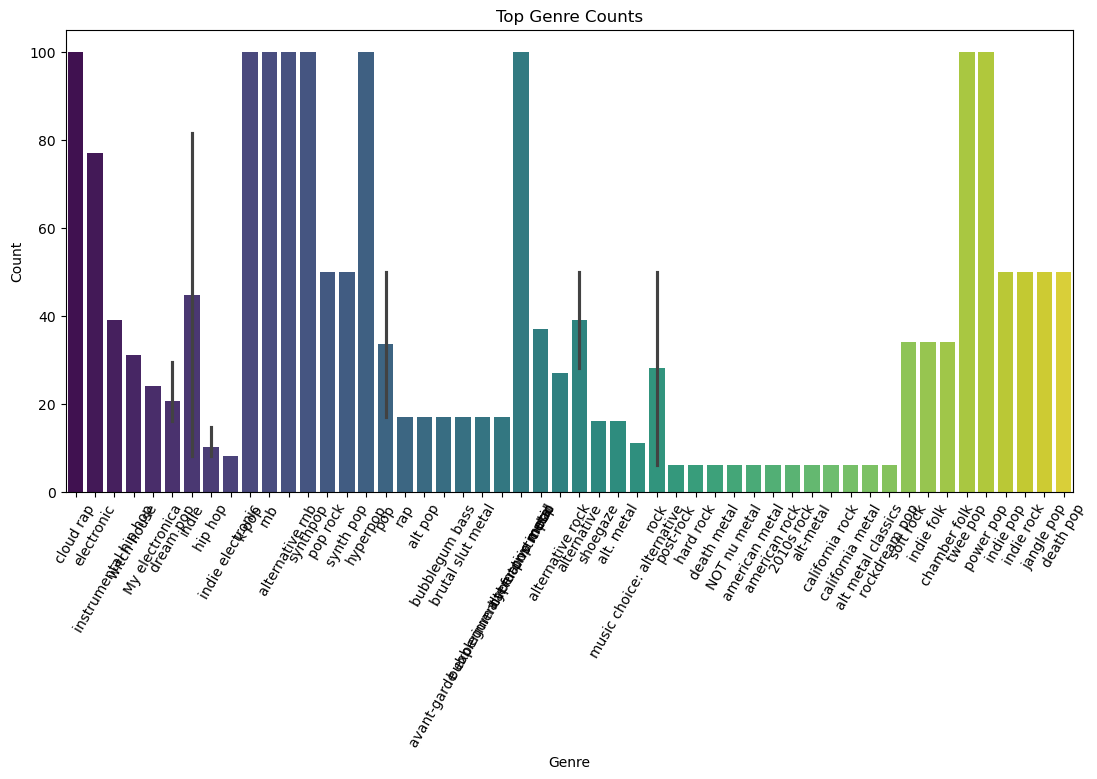

In [979]:
# Filter genres_df to include only the top genres
filtered_genres_df = genres_df[genres_df['name'].isin(top_genres)]
import seaborn as sns

# Plot
plt.figure(figsize=(13, 6))
sns.barplot(x='name', y='count', data=filtered_genres_df, palette='viridis')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top Genre Counts')

# Show the plot
plt.xticks(rotation=60)  # Rotate x-axis labels if needed
#plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [1009]:
url = BASE_URL
API_KEY = '19531c0d7972f042e9e1573b68340b89'
params = {
        #'method': 'artist.getTopTags',
        'method': 'geo.getTopArtists',
        'country': 'United States',
        'api_key': API_KEY,
        'format': 'json'
}

response = requests.get(url, params=params)
geo_data = response.json()

In [1010]:
geo_data

{'topartists': {'artist': [{'name': 'Radiohead',
    'listeners': '6700174',
    'mbid': 'a74b1b7f-71a5-4011-9441-d0b5e4122711',
    'url': 'https://www.last.fm/music/Radiohead',
    'streamable': '0',
    'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'small'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'medium'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'large'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'extralarge'},
     {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
      'size': 'mega'}]},
   {'name': 'David Bowie',
    'listeners': '4691685',
    'mbid': '5441c29d-3602-4898-b1a1-b77fa23b8e50',
    'url': 'https://www.last.fm/music/David+Bowie',
    'stre

In [1013]:
geo_df = json_normalize(geo_data['topartists']['artist'])

In [1015]:
geo_df

,name,listeners,mbid,url,streamable,image
0,Radiohead,6700174,a74b1b7f-71a5-4011-9441-d0b5e4122711,https://www.last.fm/music/Radiohead,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,David Bowie,4691685,5441c29d-3602-4898-b1a1-b77fa23b8e50,https://www.last.fm/music/David+Bowie,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,The Beatles,5426177,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,https://www.last.fm/music/The+Beatles,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,The Weeknd,4094219,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Kanye West,6741966,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Drake,5682035,b49b81cc-d5b7-4bdd-aadb-385df8de69a6,https://www.last.fm/music/Drake,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Fleetwood Mac,3785804,bd13909f-1c29-4c27-a874-d4aaf27c5b1a,https://www.last.fm/music/Fleetwood+Mac,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Kendrick Lamar,3858459,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Queen,5983430,420ca290-76c5-41af-999e-564d7c71f1a7,https://www.last.fm/music/Queen,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Weezer,4429098,6fe07aa5-fec0-4eca-a456-f29bff451b04,https://www.last.fm/music/Weezer,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [1017]:
def fetch_top_artists(region):
    params = {
        'method': 'geo.getTopArtists',
        'country': region,
        'api_key': API_KEY,
        'format': 'json'
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    return response.json()

In [1365]:
data = fetch_top_artists('China')

In [1367]:
brazil_data = json_normalize(data['topartists']['artist'])

In [1369]:
brazil_data

,name,listeners,mbid,url,streamable,image
0,Coldplay,7610513,cc197bad-dc9c-440d-a5b5-d52ba2e14234,https://www.last.fm/music/Coldplay,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Adele,4662996,cc2c9c3c-b7bc-4b8b-84d8-4fbd8779e493,https://www.last.fm/music/Adele,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Taylor Swift,4791969,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Ed Sheeran,3394209,b8a7c51f-362c-4dcb-a259-bc6e0095f0a6,https://www.last.fm/music/Ed+Sheeran,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,The Weeknd,4100483,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Maroon 5,5410408,0ab49580-c84f-44d4-875f-d83760ea2cfe,https://www.last.fm/music/Maroon+5,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Rihanna,6896150,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Lana Del Rey,4207172,b7539c32-53e7-4908-bda3-81449c367da6,https://www.last.fm/music/Lana+Del+Rey,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Lady Gaga,6079383,650e7db6-b795-4eb5-a702-5ea2fc46c848,https://www.last.fm/music/Lady+Gaga,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Sia,3576116,2f548675-008d-4332-876c-108b0c7ab9c5,https://www.last.fm/music/Sia,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [1029]:
pip install wikipedia-api

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14400 sha256=c6bdb83c12785ee3f59e62fdd0ad7a1e61e0043cd87ec2324b6e7e9b6b5a2082
  Stored in directory: c:\users\inapp\appdata\local\pip\cache\wheels\48\93\2f\978da1e445cf17606445f4b47fd8454250f5440d5a10c677e9
Successfully built wikipedia-api
Note: you may need to restart the kernel to use updated packages.


In [1059]:
import wikipediaapi

In [1061]:
from bs4 import BeautifulSoup

In [1104]:
import requests
from bs4 import BeautifulSoup

def load_population_dict(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    population_dict = {}
    table = soup.find("table", {"class": "wikitable"})
    rows = table.find_all("tr")[1:]  # Skip the header row

    for row in rows:
        data = row.find_all("td")

        country_idx, population_idx, pct_idx = 1, 2, 3
        if len(data) == 6:
            country_idx, population_idx, pct_idx = 0, 1, 2

        country = data[country_idx].text.strip()
        population = data[population_idx].text.strip()

        # Store country name as key, and population with percentage as value
        population_dict[country] = {
            "population": population,
            "percentage": data[pct_idx].text.strip(),
        }

    return population_dict

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
population_dict = load_population_dict(url)

# Check if 'list' is shadowed
try:
    # Extract and print only the country names
    country_names = list(population_dict.keys())  # Convert dictionary keys to a list
    print("Country Names:")
    print(country_names)
except TypeError as e:
    #print(f"Error: {e}")
    #print("Attempting to resolve 'list' function shadowing...")

    # Reset 'list' if it has been shadowed
    del list
    country_names = list(population_dict.keys())
    print("Country Names:")
    print(country_names)


Country Names:
['World', 'China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Philippines', 'Ethiopia', 'Egypt', 'Democratic Republic of the Congo', 'Vietnam', 'Turkey', 'Iran', 'Germany', 'France', 'United Kingdom', 'Thailand', 'Tanzania', 'South Africa', 'Italy', 'Myanmar', 'Colombia', 'Kenya', 'South Korea', 'Sudan', 'Spain', 'Argentina', 'Algeria', 'Uganda', 'Iraq', 'Canada', 'Poland', 'Morocco', 'Uzbekistan', 'Ukraine', 'Angola', 'Afghanistan', 'Peru', 'Malaysia', 'Mozambique', 'Saudi Arabia', 'Yemen', 'Ghana', 'Madagascar', 'Ivory Coast', 'Nepal', 'Cameroon', 'Venezuela', 'Australia', 'Niger', 'North Korea', 'Syria', 'Taiwan', 'Burkina Faso', 'Mali', 'Sri Lanka', 'Malawi', 'Kazakhstan', 'Chile', 'Zambia', 'Romania', 'Chad', 'Somalia', 'Senegal', 'Netherlands', 'Guatemala', 'Cambodia', 'Ecuador', 'Zimbabwe', 'South Sudan', 'Rwanda', 'Guinea', 'Benin', 'Burundi', 'Bolivia', 'Tunisia', 'Belgium', 'Papua New Guin

In [1085]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')[0]\
.iloc[:,1:4]\
.set_index('Location')\
.T\
.to_dict('list')    

{'World': [8127721171, '100%'],
 'China': [1409670000, '17.3%'],
 'India': [1404910000, '17.3%'],
 'United States': [335893238, '4.1%'],
 'Indonesia': [281603800, '3.5%'],
 'Pakistan': [241499431, '3.0%'],
 'Nigeria': [223800000, '2.8%'],
 'Brazil': [203080756, '2.5%'],
 'Bangladesh': [169828911, '2.1%'],
 'Russia': [146150789, '1.8%'],
 'Mexico': [129713690, '1.6%'],
 'Japan': [123850000, '1.5%'],
 'Philippines': [114163719, '1.4%'],
 'Ethiopia': [109499000, '1.3%'],
 'Egypt': [105914499, '1.3%'],
 'Democratic Republic of the Congo': [105247000, '1.3%'],
 'Vietnam': [100300000, '1.2%'],
 'Turkey': [85372377, '1.1%'],
 'Iran': [85000000, '1.0%'],
 'Germany': [84673158, '1.0%'],
 'France': [68468000, '0.8%'],
 'United Kingdom': [67596281, '0.8%'],
 'Thailand': [65975198, '0.8%'],
 'Tanzania': [65070448, '0.8%'],
 'South Africa': [63015904, '0.8%'],
 'Italy': [58971479, '0.7%'],
 'Myanmar': [56712559, '0.7%'],
 'Colombia': [52695952, '0.6%'],
 'Kenya': [52428290, '0.6%'],
 'South Korea':

In [1116]:
geo_df

,name,listeners,mbid,url,streamable,image
0,Radiohead,6700174,a74b1b7f-71a5-4011-9441-d0b5e4122711,https://www.last.fm/music/Radiohead,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,David Bowie,4691685,5441c29d-3602-4898-b1a1-b77fa23b8e50,https://www.last.fm/music/David+Bowie,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,The Beatles,5426177,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,https://www.last.fm/music/The+Beatles,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,The Weeknd,4094219,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Kanye West,6741966,164f0d73-1234-4e2c-8743-d77bf2191051,https://www.last.fm/music/Kanye+West,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Drake,5682035,b49b81cc-d5b7-4bdd-aadb-385df8de69a6,https://www.last.fm/music/Drake,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Fleetwood Mac,3785804,bd13909f-1c29-4c27-a874-d4aaf27c5b1a,https://www.last.fm/music/Fleetwood+Mac,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Kendrick Lamar,3858459,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Queen,5983430,420ca290-76c5-41af-999e-564d7c71f1a7,https://www.last.fm/music/Queen,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Weezer,4429098,6fe07aa5-fec0-4eca-a456-f29bff451b04,https://www.last.fm/music/Weezer,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [1131]:
country_names

['World',
 'China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Philippines',
 'Ethiopia',
 'Egypt',
 'Democratic Republic of the Congo',
 'Vietnam',
 'Turkey',
 'Iran',
 'Germany',
 'France',
 'United Kingdom',
 'Thailand',
 'Tanzania',
 'South Africa',
 'Italy',
 'Myanmar',
 'Colombia',
 'Kenya',
 'South Korea',
 'Sudan',
 'Spain',
 'Argentina',
 'Algeria',
 'Uganda',
 'Iraq',
 'Canada',
 'Poland',
 'Morocco',
 'Uzbekistan',
 'Ukraine',
 'Angola',
 'Afghanistan',
 'Peru',
 'Malaysia',
 'Mozambique',
 'Saudi Arabia',
 'Yemen',
 'Ghana',
 'Madagascar',
 'Ivory Coast',
 'Nepal',
 'Cameroon',
 'Venezuela',
 'Australia',
 'Niger',
 'North Korea',
 'Syria',
 'Taiwan',
 'Burkina Faso',
 'Mali',
 'Sri Lanka',
 'Malawi',
 'Kazakhstan',
 'Chile',
 'Zambia',
 'Romania',
 'Chad',
 'Somalia',
 'Senegal',
 'Netherlands',
 'Guatemala',
 'Cambodia',
 'Ecuador',
 'Zimbabwe',
 'South Sudan',
 'Rwanda',
 'Guinea',
 'Beni

In [1133]:
del(country_names[0])

In [1318]:
country_names

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan',
 'Philippines',
 'Ethiopia',
 'Egypt',
 'Democratic Republic of the Congo',
 'Vietnam',
 'Turkey',
 'Iran',
 'Germany',
 'France',
 'United Kingdom',
 'Thailand',
 'Tanzania',
 'South Africa',
 'Italy',
 'Myanmar',
 'Colombia',
 'Kenya',
 'South Korea',
 'Sudan',
 'Spain',
 'Argentina',
 'Algeria',
 'Uganda',
 'Iraq',
 'Canada',
 'Poland',
 'Morocco',
 'Uzbekistan',
 'Ukraine',
 'Angola',
 'Afghanistan',
 'Peru',
 'Malaysia',
 'Mozambique',
 'Saudi Arabia',
 'Yemen',
 'Ghana',
 'Madagascar',
 'Ivory Coast',
 'Nepal',
 'Cameroon',
 'Venezuela',
 'Australia',
 'Niger',
 'North Korea',
 'Syria',
 'Taiwan',
 'Burkina Faso',
 'Mali',
 'Sri Lanka',
 'Malawi',
 'Kazakhstan',
 'Chile',
 'Zambia',
 'Romania',
 'Chad',
 'Somalia',
 'Senegal',
 'Netherlands',
 'Guatemala',
 'Cambodia',
 'Ecuador',
 'Zimbabwe',
 'South Sudan',
 'Rwanda',
 'Guinea',
 'Benin',
 'Buru

In [1333]:
for region in country_names: 
    data = fetch_top_artists(region)
    print(region)
    print('\n')
    #print(data)
    #top_artists = data.get('topartists', {}).get('artist', [])
    current_region_df = json_normalize(data['topartists']['artist'])
    print(current_region_df['name'], current_region_df['listeners'])
    

    #top_artists = data.get('topartists', {}).get('artist', [])

China


0              Coldplay
1                 Adele
2          Taylor Swift
3            Ed Sheeran
4            The Weeknd
5              Maroon 5
6               Rihanna
7          Lana Del Rey
8             Lady Gaga
9                   Sia
10            Radiohead
11        Ariana Grande
12                  周杰倫
13                   王菲
14           Katy Perry
15      Imagine Dragons
16              Beyoncé
17          The Beatles
18            Sam Smith
19                Drake
20        Justin Bieber
21        Calvin Harris
22           Bruno Mars
23       Ellie Goulding
24          OneRepublic
25                Queen
26         Mariah Carey
27          David Bowie
28               Eminem
29                  陳奕迅
30      Michael Jackson
31     The Chainsmokers
32          Miley Cyrus
33                Lorde
34          Linkin Park
35       Britney Spears
36    Justin Timberlake
37         Shawn Mendes
38           Kanye West
39     Carly Rae Jepsen
40         Charlie Puth
41      

KeyError: 'topartists'

In [1320]:
top_artists

[{'name': 'Daft Punk',
  'listeners': '5302775',
  'mbid': '056e4f3e-d505-4dad-8ec1-d04f521cbb56',
  'url': 'https://www.last.fm/music/Daft+Punk',
  'streamable': '0',
  'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png',
    'size': 'small'},
   {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png',
    'size': 'medium'},
   {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png',
    'size': 'large'},
   {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
    'size': 'extralarge'},
   {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png',
    'size': 'mega'}]},
 {'name': 'The Weeknd',
  'listeners': '4100483',
  'mbid': 'c8b03190-306c-4120-bb0b-6f2ebfc06ea9',
  'url': 'https://www.last.fm/music/The+Weeknd',
  'streamable': '0',
  'image': [{'#text': 'https://lastfm.freetls.fastly

In [1142]:
geo_df = json_normalize(top_artists)

In [1144]:
geo_df

,name,listeners,mbid,url,streamable,image
0,Linkin Park,5516730,f59c5520-5f46-4d2c-b2c4-822eabf53419,https://www.last.fm/music/Linkin+Park,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Coldplay,7604405,cc197bad-dc9c-440d-a5b5-d52ba2e14234,https://www.last.fm/music/Coldplay,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,Red Hot Chili Peppers,6121216,8bfac288-ccc5-448d-9573-c33ea2aa5c30,https://www.last.fm/music/Red+Hot+Chili+Peppers,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Lana Del Rey,4201056,b7539c32-53e7-4908-bda3-81449c367da6,https://www.last.fm/music/Lana+Del+Rey,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Muse,5282532,fd857293-5ab8-40de-b29e-55a69d4e4d0f,https://www.last.fm/music/Muse,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
5,Imagine Dragons,3317973,012151a8-0f9a-44c9-997f-ebd68b5389f9,https://www.last.fm/music/Imagine+Dragons,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
6,Radiohead,6700174,a74b1b7f-71a5-4011-9441-d0b5e4122711,https://www.last.fm/music/Radiohead,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
7,Eminem,6657652,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,https://www.last.fm/music/Eminem,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
8,Maroon 5,5405128,0ab49580-c84f-44d4-875f-d83760ea2cfe,https://www.last.fm/music/Maroon+5,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
9,Green Day,5333385,084308bd-1654-436f-ba03-df6697104e19,https://www.last.fm/music/Green+Day,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [1160]:
geo_df['name']

0               Linkin Park
1                  Coldplay
2     Red Hot Chili Peppers
3              Lana Del Rey
4                      Muse
5           Imagine Dragons
6                 Radiohead
7                    Eminem
8                  Maroon 5
9                 Green Day
10                    Adele
11                    Queen
12              OneRepublic
13               Ed Sheeran
14                  Nirvana
15                      Sia
16         System of a Down
17              The Beatles
18                  Placebo
19                     Moby
20             Depeche Mode
21              Evanescence
22               The Weeknd
23                 Gorillaz
24                Metallica
25              The Killers
26           Marilyn Manson
27              Limp Bizkit
28                   The xx
29                  Rihanna
30        Twenty One Pilots
31                Rammstein
32              The Prodigy
33               Pink Floyd
34                Daft Punk
35          Michael 

In [1194]:
target_artist_name = "Rihanna"
artist_row = geo_df['name'].str.lower() == target_artist_name.lower()

In [1246]:
art = artist_row[artist_row == True].index

In [1270]:
geo_df.loc[art[0]]

name                                                    Rihanna
listeners                                               6889684
mbid                       db36a76f-4cdf-43ac-8cd0-5e48092d2bae
url                           https://www.last.fm/music/Rihanna
streamable                                                    0
image         [{'#text': 'https://lastfm.freetls.fastly.net/...
Name: 29, dtype: object

In [1280]:
geo_df.loc[art[0]]['listeners']

'6889684'

In [1300]:
def analyze_artist_popularity(regions, target_artist_name):
    artist_popularity = {}

    for region in regions:
        data = fetch_top_artists(region)
        top_artists = data.get('topartists', {}).get('artist', [])
        
        # Normalize the list of top artists into a DataFrame
        geo_df = json_normalize(top_artists)
        
        # Find the target artist in the DataFrame
        print(geo_df['name'])
        artist_rows = geo_df['name'].str.lower() == target_artist_name.lower()
        
        artist_index = artist_rows[artist_rows == True].index
        #print(artist_index[0])

        if not artist_rows.empty:  # Check if the artist exists in the list
            # Extract the number of listeners if the artist is found
            artist_row = geo_df.loc[art[0]]
            listeners = artist_row['listeners']  # Get the number of listeners
            #print(listeners)
            artist_popularity[region] = int(listeners)  # Convert to integer
            print(artist_popularity)
        else:
            # Artist not found in this region
            artist_popularity[region] = 0

    # Sort the regions by the artist's popularity
    sorted_regions = sorted(artist_popularity.items(), key=lambda x: x[1], reverse=True)

    return sorted_regions

In [1306]:
analyze_artist_popularity(country_names, 'Coldplay')

0              Coldplay
1                 Adele
2          Taylor Swift
3            Ed Sheeran
4            The Weeknd
5              Maroon 5
6               Rihanna
7          Lana Del Rey
8             Lady Gaga
9                   Sia
10            Radiohead
11        Ariana Grande
12                  周杰倫
13                   王菲
14           Katy Perry
15      Imagine Dragons
16              Beyoncé
17          The Beatles
18                Drake
19            Sam Smith
20        Justin Bieber
21        Calvin Harris
22           Bruno Mars
23       Ellie Goulding
24          OneRepublic
25                Queen
26         Mariah Carey
27          David Bowie
28               Eminem
29                  陳奕迅
30      Michael Jackson
31     The Chainsmokers
32          Miley Cyrus
33                Lorde
34          Linkin Park
35       Britney Spears
36    Justin Timberlake
37         Shawn Mendes
38           Kanye West
39     Carly Rae Jepsen
40         Charlie Puth
41        Billie

KeyError: 'name'

In [1290]:
sorted_regions

NameError: name 'sorted_regions' is not defined

In [989]:
url = BASE_URL
params = {
        #'method': 'artist.getTopTags',
        'method': 'user.getRecentTracks',
        'user': 'awebusan',
        'api_key': API_KEY,
        'format': 'json'
}

response = requests.get(url, params=params)
data = response.json()

#tracks_df[0].getTags

In [453]:
from datetime import date, timedelta

In [455]:
today = date.today()

In [457]:
date.today() - timedelta(days=7)

datetime.date(2024, 8, 16)

In [459]:
today.day

23

In [461]:
one_week_ago = today - timedelta(days=7)

In [463]:
one_week_ago

datetime.date(2024, 8, 16)

In [465]:
one_week_ago.day

16

In [482]:
user_df = json_normalize(data['recenttracks']['track'])

In [484]:
user_df

,streamable,image,mbid,name,url,artist.mbid,artist.#text,album.mbid,album.#text,@attr.nowplaying,date.uts,date.#text
0,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",3b864454-61c4-4fe7-a8f0-231ecb359a46,Personal,https://www.last.fm/music/Plaza/_/Personal,7e9b4c8e-0dce-4fbf-83eb-1d9e081cdec2,Plaza,a9597fa2-e66f-48ec-9fca-4f09ea1663eb,SHADOW,true,NaN,NaN
1,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",3b864454-61c4-4fe7-a8f0-231ecb359a46,Personal,https://www.last.fm/music/Plaza/_/Personal,7e9b4c8e-0dce-4fbf-83eb-1d9e081cdec2,Plaza,a9597fa2-e66f-48ec-9fca-4f09ea1663eb,SHADOW,NaN,1724404556,"23 Aug 2024, 09:15"
2,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",1def37b2-0057-42cd-8b20-254ee3919bed,Using You,https://www.last.fm/music/Mars+Argo/_/Using+You,4b1e6dd1-490a-4c17-8cfb-3ba993a90c80,Mars Argo,0362906f-20ed-49fe-9fc7-305fc025062b,Linden Place EP,NaN,1724404348,"23 Aug 2024, 09:12"
3,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,FAKE LOVE Demo VER. (JIMIN & RM of BTS ),https://www.last.fm/music/Hana/_/FAKE+LOVE+Dem...,,Hana,,,NaN,1724404240,"23 Aug 2024, 09:10"
4,0,"[{'size': 'small', '#text': 'https://lastfm.fr...",269b5058-4394-4faf-8f1d-30dd2be4b404,Use Me,https://www.last.fm/music/Plaza/_/Use+Me,7e9b4c8e-0dce-4fbf-83eb-1d9e081cdec2,Plaza,,Use Me,NaN,1724297167,"22 Aug 2024, 03:26"
5,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Beautiful,https://www.last.fm/music/%EB%B0%A9%ED%83%84%E...,,방탄소년단,,,NaN,1724296961,"22 Aug 2024, 03:22"
6,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Hoobastank,https://www.last.fm/music/The+Reason/_/Hoobastank,,The Reason,,,NaN,1724296849,"22 Aug 2024, 03:20"
7,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Hoobastank,https://www.last.fm/music/The+Reason/_/Hoobastank,,The Reason,,,NaN,1724296628,"22 Aug 2024, 03:17"
8,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Hoobastank,https://www.last.fm/music/The+Reason/_/Hoobastank,,The Reason,,,NaN,1724296406,"22 Aug 2024, 03:13"
9,0,"[{'size': 'small', '#text': ''}, {'size': 'med...",,Hoobastank,https://www.last.fm/music/The+Reason/_/Hoobastank,,The Reason,,,NaN,1724244135,"21 Aug 2024, 12:42"


In [323]:
for i in range(today.day, one_week_ago.day-1, -1):
    print(i)
    url = BASE_URL
    params = {
        #,'method': 'artist.getTopTags'
        'method': 'track.getTopTags',
        'artist': tracks_df['artist'][i],#'Katy Perry',
        #'artist' : tracks_df['artist'][0],
        'track': tracks_df['track'][i],#'If You Can Afford Me',
        #'track_mbid': '3b864454-61c4-4fe7-a8f0-231ecb359a46',
        #'autocorrect': 0,
        'api_key': "19531c0d7972f042e9e1573b68340b89",
        'format': 'json'
    }

    full_url = f"{url}?{urlencode(params)}"
    print(full_url)  # Print the full URL
    response = requests.get(full_url)
#response = requests.get(url, params=params)
#response = requests.get("https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&api_key=19531c0d7972f042e9e1573b68340b89&artist=Katy+Perry&track=California+Gurls+(feat.+Snoop+Dogg)&format=json")
    data = response.json()

22
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Michael+Jackson&track=Fly+Away&api_key=19531c0d7972f042e9e1573b68340b89&format=json
21
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Slug+Orientation+How&track=Using+MyScheduler&api_key=19531c0d7972f042e9e1573b68340b89&format=json
20
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Slug+Orientation+How&track=Generating+Schedules&api_key=19531c0d7972f042e9e1573b68340b89&format=json
19
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Alex+G&track=Sarah&api_key=19531c0d7972f042e9e1573b68340b89&format=json
18
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Alex+G&track=Sarah&api_key=19531c0d7972f042e9e1573b68340b89&format=json
17
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=The+Cranberries&track=Linger&api_key=19531c0d7972f042e9e1573b68340b89&format=json
16
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Nova&tra

In [149]:
data

{'recenttracks': {'track': [{'artist': {'mbid': '', '#text': 'BTS'},
    'streamable': '0',
    'image': [{'size': 'small', '#text': ''},
     {'size': 'medium', '#text': ''},
     {'size': 'large', '#text': ''},
     {'size': 'extralarge', '#text': ''}],
    'mbid': '',
    'album': {'mbid': '', '#text': ''},
    'name': '03 각성(覺醒)',
    '@attr': {'nowplaying': 'true'},
    'url': 'https://www.last.fm/music/BTS/_/03+%EA%B0%81%EC%84%B1(%E8%A6%BA%E9%86%92)'},
   {'artist': {'mbid': '', '#text': 'Sweet The Kid'},
    'streamable': '0',
    'image': [{'size': 'small',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/34s/c9e81d82f41b42c5f9043806829e8705.jpg'},
     {'size': 'medium',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/64s/c9e81d82f41b42c5f9043806829e8705.jpg'},
     {'size': 'large',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/174s/c9e81d82f41b42c5f9043806829e8705.jpg'},
     {'size': 'extralarge',
      '#text': 'https://lastfm.freetls.fastly.net/i/u/300x

In [249]:
from urllib.parse import urlencode, urlparse, parse_qs, unquote
for i in range(len(tracks_df)):
    url = BASE_URL
    params = {
        #,'method': 'artist.getTopTags'
        'method': 'track.getTopTags',
        'artist': tracks_df['artist'][i],#'Katy Perry',
        #'artist' : tracks_df['artist'][0],
        'track': tracks_df['track'][i],#'If You Can Afford Me',
        #'track_mbid': '3b864454-61c4-4fe7-a8f0-231ecb359a46',
        #'autocorrect': 0,
        'api_key': "19531c0d7972f042e9e1573b68340b89",
        'format': 'json'
    }

    full_url = f"{url}?{urlencode(params)}"
    print(full_url)  # Print the full URL
    response = requests.get(full_url)
#response = requests.get(url, params=params)
#response = requests.get("https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&api_key=19531c0d7972f042e9e1573b68340b89&artist=Katy+Perry&track=California+Gurls+(feat.+Snoop+Dogg)&format=json")
    data = response.json()

#tracks_df[0].getTags

https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Plaza&track=Personal&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Mars+Argo&track=Using+You&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Mars+Argo&track=Runaway+Runaway&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=RM+%26+Jungkook&track=I+Know&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Jimin&track=Letter+%28%ED%8E%B8%EC%A7%80%29+%28HIDDEN+TRACK+FACE+ALBUM+CD+Only%29&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Young+Love&track=BTS&api_key=19531c0d7972f042e9e1573b68340b89&format=json
https://ws.audioscrobbler.com/2.0/?method=track.getTopTags&artist=Legacy+%2

KeyboardInterrupt: 

In [ ]:
data

In [60]:
artist_name = 'Cher'
response = requests.get('https://ws.audioscrobbler.com/2.0/', params='method': 'artist.getTopTags', 'artist' : artist_name
                       , 'api_key': API_KEY, 'format': 'json')
#response = requests.get(url, params=params)
data = response.json()

SyntaxError: invalid syntax (1931064412.py, line 2)

In [52]:
data

{'error': 6, 'message': 'User not found', 'links': []}

In [15]:

def get_artist_genres(artist_name, api_key):
    url = BASE_URL
    params = {
        'method': 'artist.getTopTags',
        'artist': artist_name,
        'api_key': api_key,
        'format': 'json'
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # Check if data contains tags
        if 'toptags' in data and 'tag' in data['toptags']:
            tags = data['toptags']['tag']
            return [tag['name'] for tag in tags]
        else:
            return []
    except Exception as e:
        print(f"Error fetching data for {artist_name}: {e}")
        return []

def get_all_genres(tracks_df, api_key):
    all_genres = set()
    
    unique_artists = tracks_df['artist'].unique()
    
    for artist in unique_artists:
        genres = get_artist_genres(artist, api_key)
        all_genres.update(genres)
    
    return all_genres

# Load the CSV file
file_path = 'Downloads/recenttracks-awebusan-1723633826.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
tracks_df = df[['artist', 'track']].dropna()

# Fetch genres for all unique artists
unique_genres = get_all_genres(tracks_df, API_KEY)
print("Unique genres extracted:")
print(unique_genres)


Unique genres extracted:
{'italian disco', 'sam smith', 'Grupo Fav', 'stayc outdid', 'sho-ta', 'jo kwon', 'pakistani rock', 'the color brown', 'israeli', 'slumdog millionaire', 'gorgeous', 'tamil', 'Eighth Wonder Of The World', 'Cinematic Classical', 'Similar to Omori', 'progressive jazz fusion', 'travis', 'anarcho-punk', 'indie punk', 'Madison Beer farting in jeans', 'judges', 'new loves', 'napoli', 'SMTOWN', 'foggy', 'somalian trap', 'abstract hip hop', 'hype rap', 'one hit wonder', 'The Poni-Tails', 'luther', 'big beat', 'paino music', 'jamie xx', 'KRIS', ' male vocalists', 'Rob Boak', 'wrote this song for corta', 'Romantic Classical', '49', 'fer sure', 'rock 70s', '909 Worldwide', 'industrial rock', 'Swedish Metal', 'causehavoc', 'sample-based', 'california seixas', 'explorations', 'Traditional Pop', 'coltemonikha', '6yrs', 'fjellparkfestivalen', 'GREATEST EVER', 'organ', 'Dreamy', 'enigmatic', 'artista completo e contemporaneo', 'modern indie pop', 'nerdcore', 'hollow', '60s girls

In [18]:
from collections import Counter
def count_genres(tracks_df, api_key):
    genre_counter = Counter()
    
    # Get unique artists
    unique_artists = tracks_df['artist'].unique()
    
    for artist in unique_artists:
        genres = get_artist_genres(artist, api_key)
        genre_counter.update(genres)
    
    return genre_counter

# Fetch and count genres
genre_counts = count_genres(tracks_df, API_KEY)

# Print the genre counts
print("Genre counts:")
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")


Genre counts:
new beat: 2
House: 113
techno: 92
euro house: 3
Belgisch: 1
flash house: 1
Disco: 69
seen live: 701
pop: 855
Belgium: 16
eurodance: 34
dance: 363
canada: 42
90s: 140
rnb: 456
nederlands: 4
80s Pop: 14
belgian electronics: 1
plaza: 1
trance: 66
swedish: 30
female vocalists: 479
album rock: 6
funk: 136
3: 83
portuguese: 11
r and b: 58
California: 128
90s dance: 5
toronto: 15
romance: 6
stockholm: 5
shows: 2
aleister crowley: 3
tugas: 1
All: 312
Anal: 4
Portuguese music: 1
poo: 3
Christopher Lee: 3
blogs: 1
musica: 1
Aleyster Crowley: 3
chill-house: 1
Argeu california seixas: 3
Silvio Passos: 3
Wilson Seixas: 3
california seixas: 3
one album band: 2
familia: 3
aleister: 2
Raul Seixas: 3
cultura: 1
Camisa de Venus: 1
hoer: 1
Amidio Junior: 3
Filmes: 1
stront: 1
new piet: 1
Anyzio Rocha: 3
Nova California Seixas: 3
mucajai: 3
Argeu California: 3
BEto Juara: 3
Don Kalifa: 3
caracarai: 3
AleysterCrowleyPE: 2
DonKalifa: 3
AleysterCrowley: 2
simplesdemais: 2
Os Putos Brothers: 3
A

In [ ]:
def my_fave_genres(music_list):
    genres = {}
    

In [1409]:
geo_lastfm_mb = pd.read_csv('Downloads/artists.csv', low_memory=False)

In [1411]:
geo_lastfm_mb.head()

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [1511]:
geo_lastfm_mb['tags_list'] = geo_lastfm_mb['tags_mb'].str.split(';')

In [1529]:
geo_lastfm_mb['tags_list'] = geo_lastfm_mb['tags_list'].apply(lambda x: x if isinstance(x, list) else [])
search_tag = 'turkish'

# Create a boolean column that checks if the search_tag is in the tags_list
geo_lastfm_mb['has_tag'] = geo_lastfm_mb['tags_list'].apply(lambda tags: search_tag in tags)

In [1531]:
print(geo_lastfm_mb)

                                         mbid              artist_mb  \
0        cc197bad-dc9c-440d-a5b5-d52ba2e14234               Coldplay   
1        a74b1b7f-71a5-4011-9441-d0b5e4122711              Radiohead   
2        8bfac288-ccc5-448d-9573-c33ea2aa5c30  Red Hot Chili Peppers   
3        73e5e69d-3554-40d8-8516-00cb38737a1c                Rihanna   
4        b95ce3ff-3d05-4e87-9e01-c97b66af13d4                 Eminem   
...                                       ...                    ...   
1466078  1eab523e-98ff-4083-aa34-8922740bc696                    정은지   
1466079  a18f0527-907e-42b0-8268-504966274581                    남태현   
1466080  20a57e37-24b5-4301-855b-35076580fb88                    헤일로   
1466081  83891a4d-1bf4-4abe-a483-5b3d9d614efa                    서현진   
1466082  3d05dd13-f524-4e80-91aa-24094e8b5928                    김희철   

                 artist_lastfm      country_mb           country_lastfm  \
0                     Coldplay  United Kingdom           Uni

In [1577]:
#search_tag = 'turkish'

# Get the index of the row where 'artist' column matches 'search_artist'
index = geo_lastfm_mb.query('has_tag == True').index
for i in index:
    print(i)
    print(geo_lastfm_mb['country_lastfm'][i])
print(index)

4
United States
1887
Georgia; Turkey; United States
5470
Germany; Turkey
7165
Chile; Turkey; United States
7663
Turkey
8693
Turkey
9081
Turkey; United Kingdom
11170
Turkey
11343
Italy; Turkey; United Kingdom
11779
Turkey
12177
Turkey
12449
Turkey
12547
Turkey
12992
Turkey
13328
Turkey
13736
Azerbaijan; Greece; Italy; Spain; Turkey
14077
Turkey
14452
Turkey
14531
Sweden; Turkey
14617
Turkey
15050
Turkey
15066
Turkey
16682
Turkey
16755
Turkey
16769
Armenia; Turkey
17181
Turkey
17227
Greece; Turkey
18285
Turkey
18614
Turkey
18616
Turkey
19343
Turkey
20168
Poland; Turkey; United Kingdom
20350
Turkey
20561
Turkey; United States
20601
Turkey
21206
Japan; Turkey
21899
Turkey
21990
Turkey; Yemen
22083
Turkey
22682
Turkey
22991
Turkey
23522
Turkey
24031
Armenia; Azerbaijan; Iran; Turkey
24140
Turkey
24547
Turkey
24674
Turkey
25537
France; Iran; Italy; Malaysia; Spain
25622
Turkey
26324
Turkey
26435
Turkey
27159
Turkey
27230
Turkey
27620
Ireland; Turkey
27638
Turkey
28382
Turkey
28510
Turkey
285

In [1541]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/323.6 kB ? eta -:--:--
   ------- ------------------------------- 61.4/323.6 kB 825.8 kB/s eta 0:00:01
   ------------- -------------------------- 112.6/323.6 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 225.3/323.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  317.4/323.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.2/15.9 MB 15.0 MB/s eta 0:00:02
   - -------------------------------------- 0.5/15.9 MB 6.7 MB/s eta 0:00:03
   - -------------------------------------- 0.5/15.9 MB 6.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/15.9 MB 5.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/15.9 MB 6.0 MB/s eta 0:00:03
 

In [1543]:
import geopandas as gpd

In [1697]:
#search_tag = 'rock'

# Filter rows where the tag is present
search_tag = 'pop'
filtered_df = geo_lastfm_mb[geo_lastfm_mb['tags_list'].apply(lambda tags: search_tag in tags)]
#filtered_df = geo_lastfm_mb[geo_lastfm_mb['tags_list'].str.contains(search_tag, na=False)]
#print(filtered_df)
#plot_df = filtered_df.copy()

In [1699]:
filtered_df

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,tags_list,has_tag
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False,"[pop, dance, hip hop, reggae, contemporary...",False
20,859d0860-d480-4efd-970c-c05d5f1776b8,Beyoncé,Beyoncé,United States,United States,pop; hard rock; funk; country; soul; electropo...,rnb; pop; female vocalists; soul; Hip-Hop; bey...,3554615.0,153947081.0,False,"[pop, hard rock, funk, country, soul, ele...",False
29,d5be5333-4171-427e-8e12-732087c6b78e,The Black Eyed Peas,Black Eyed Peas,United States,NaN,pop; electropop; dance-pop; pop rap; electro h...,Hip-Hop; pop; rnb; rap; hip hop,3346410.0,71031050.0,False,"[pop, electropop, dance-pop, pop rap, elec...",False
31,45a663b5-b1cb-4a91-bff6-2bef7bbfdd76,Britney Spears,Britney Spears,United States,United States,pop; dance; american; usa; electropop; américa...,pop; dance; female vocalists; Britney Spears; ...,3255085.0,201961724.0,False,"[pop, dance, american, usa, electropop, a...",False
35,f82bcf78-5b69-4622-a5ef-73800768d9ac,JAY-Z,Jay-Z,United States,United States,pop; rap; hip-hop; hip hop; hiphop; pop rap; r...,Hip-Hop; rap; hip hop; east coast rap; jay-z; ...,3169635.0,85047192.0,False,"[pop, rap, hip-hop, hip hop, hiphop, pop ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...
1462752,c1aa2ec9-53e7-4d90-8d36-bac75832e986,The Supremes,NaN,United States,NaN,pop; soul; girl group; classic pop and rock; p...,NaN,NaN,NaN,False,"[pop, soul, girl group, classic pop and roc...",False
1464115,8fad0a89-3d55-437d-ae74-c91c7ad9740b,The Saints,NaN,United Kingdom,Australia,pop; instrumental; surf,NaN,NaN,NaN,False,"[pop, instrumental, surf]",False
1464455,b823c04d-0439-4926-b5ef-aa6349946b1e,TIJUANA,NaN,United Kingdom,Brazil,pop; hip-hop; dub; electronica; tijuana; rocst...,NaN,NaN,NaN,False,"[pop, hip-hop, dub, electronica, tijuana, ...",False
1464480,233ee9c8-c7bd-4365-b0be-ba5536206964,China Moses,NaN,France,United States,pop; jazz; soul; rhythm and blues,NaN,NaN,NaN,False,"[pop, jazz, soul, rhythm and blues]",False


In [1701]:
filtered_df.columns

Index(['mbid', 'artist_mb', 'artist_lastfm', 'country_mb', 'country_lastfm',
       'tags_mb', 'tags_lastfm', 'listeners_lastfm', 'scrobbles_lastfm',
       'ambiguous_artist', 'tags_list', 'has_tag'],
      dtype='object')

In [1677]:
world = gpd.read_file("Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")


In [1705]:
if 'SOVEREIGNT' in world.columns:
    world = world.rename(columns={'SOVEREIGNT': 'country_lastfm'})
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOV_A3', 'ADM0_DIF', 'LEVEL',
       'TYPE', 'TLC', 'ADMIN', 'ADM0_A3',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=168)


In [1707]:
world.head()

,featurecla,scalerank,LABELRANK,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
country_lastfm,,,,,,,,,,,,,,,,,,,,,
Fiji,Admin-0 country,1,6,FJI,0,2,Sovereign country,1,Fiji,FJI,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
United Republic of Tanzania,Admin-0 country,1,3,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
Western Sahara,Admin-0 country,1,7,SAH,0,2,Indeterminate,1,Western Sahara,SAH,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,Admin-0 country,1,2,CAN,0,2,Sovereign country,1,Canada,CAN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
United States of America,Admin-0 country,1,2,US1,1,2,Country,1,United States of America,USA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [1715]:
print("Filtered DataFrame country names:", filtered_df['country_lastfm'].unique())
print("World DataFrame country names:", world['country_lastfm'].unique())

Filtered DataFrame country names: ['Barbados; United States' 'United States' nan 'United Kingdom'
 'Georgia; United States' 'Senegal; United States' 'Canada'
 'Canada; Norway; United States' 'United Kingdom; United States' 'Spain'
 'Brazil; United States' 'Jamaica' 'Canada; France' 'Ireland'
 'Italy; United States' 'Sweden' 'Norway; United States'
 'China; Jamaica; United States' 'Greece; United Kingdom'
 'Ireland; United Kingdom; United States' 'India; United Kingdom'
 'Australia' 'Scotland; United Kingdom' 'Germany' 'Finland; United States'
 'Denmark; Norway' 'Puerto Rico; Spain; United States'
 'Germany; Trinidad and Tobago; United States' 'Albania; United Kingdom'
 'China; United Kingdom' 'Canada; United Kingdom' 'Romania'
 'Jersey; United States' 'Ireland; United Kingdom' 'Brazil; Portugal'
 'Germany; United Kingdom' 'Netherlands'
 'Dominican Republic; Spain; United States' 'Finland' 'Puerto Rico; Spain'
 'Jersey; United Kingdom; United States' 'Brazil'
 'Cuba; Italy; Mexico; Puer

KeyError: 'country_lastfm'

In [1685]:
world.set_index('country_lastfm', inplace=True)
filtered_df.set_index('country_lastfm', inplace=True)

# Merge the DataFrames
merged = world.join(filtered_df)

# Check the merged DataFrame
print(merged.head())

                                  featurecla  scalerank  LABELRANK SOV_A3  \
country_lastfm                                                              
Fiji                         Admin-0 country          1          6    FJI   
United Republic of Tanzania  Admin-0 country          1          3    TZA   
Western Sahara               Admin-0 country          1          7    SAH   
Canada                       Admin-0 country          1          2    CAN   
Canada                       Admin-0 country          1          2    CAN   

                             ADM0_DIF  LEVEL               TYPE TLC  \
country_lastfm                                                        
Fiji                                0      2  Sovereign country   1   
United Republic of Tanzania         0      2  Sovereign country   1   
Western Sahara                      0      2      Indeterminate   1   
Canada                              0      2  Sovereign country   1   
Canada                            

In [1687]:
merged.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOV_A3', 'ADM0_DIF', 'LEVEL',
       'TYPE', 'TLC', 'ADMIN', 'ADM0_A3',
       ...
       'artist_mb', 'artist_lastfm', 'country_mb', 'tags_mb', 'tags_lastfm',
       'listeners_lastfm', 'scrobbles_lastfm', 'ambiguous_artist', 'tags_list',
       'has_tag'],
      dtype='object', length=179)

In [1691]:
print(merged['listeners_lastfm'].unique())

# Check summary statistics to ensure values are in a reasonable range
print(merged['listeners_lastfm'].describe())

[        nan 4.45260e+04 7.31000e+03 1.54700e+03 7.05000e+02 3.14000e+02
 1.01000e+02 0.00000e+00 2.09080e+04 4.03408e+05 2.94290e+04 1.56190e+04
 6.82400e+03 3.55100e+03 3.00900e+03 3.00300e+03 2.37800e+03 2.36300e+03
 4.16000e+02 9.02850e+05 1.85420e+05 1.34979e+05 2.43070e+04 2.34870e+04
 1.17220e+04 4.54400e+03 8.53000e+02 4.67000e+02 4.20000e+02 2.76000e+02
 4.99550e+04 3.87240e+04 1.35850e+04 7.34100e+03 2.15200e+03 3.68130e+04
 1.60420e+04 1.45370e+04 1.42890e+04 1.30760e+04 9.59200e+03 8.00600e+03
 7.82400e+03 6.27600e+03 5.92700e+03 5.91300e+03 4.10900e+03 4.05500e+03
 3.63300e+03 2.74100e+03 2.58400e+03 2.41800e+03 1.98400e+03 1.89700e+03
 1.62900e+03 1.36500e+03 1.14700e+03 8.00000e+02 7.62000e+02 5.24000e+02
 3.84000e+02 3.59000e+02 3.18000e+02 1.70000e+02 1.00000e+02 1.03145e+05
 3.00310e+04 1.12280e+04 8.81700e+03 5.68900e+03 4.54300e+03 3.91100e+03
 3.48300e+03 1.60300e+03 1.54500e+03 8.33000e+02 6.04000e+02 5.95000e+02
 5.42000e+02 1.27000e+02 8.60000e+01 8.03910e+04 3.

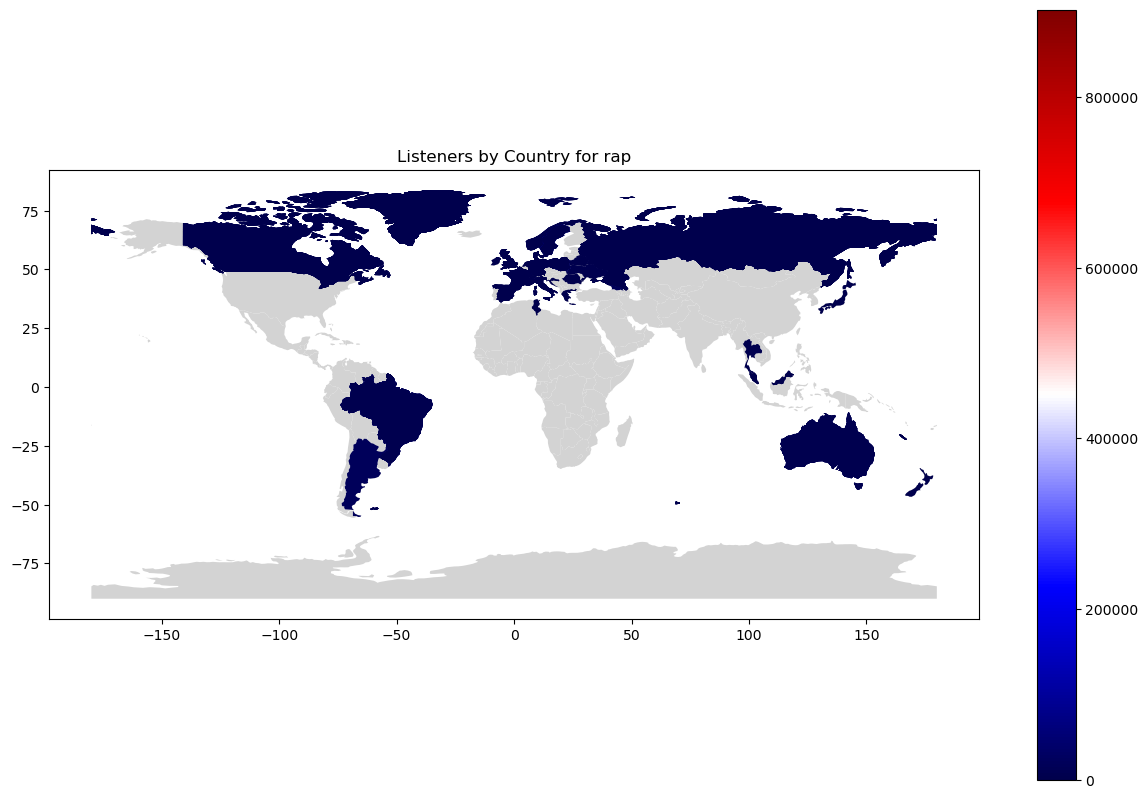

In [1695]:
# Plot with minimal settings
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot base map

if not merged.empty:
    try:
        merged.plot(ax=ax, column=column_name, legend=True, cmap='seismic')
    except Exception as e:
        print("Error while plotting:", e)
else:
    print("Merged GeoDataFrame is empty, nothing to plot.")

plt.title('Listeners by Country for '+ search_tag)
plt.show()

ValueError: 'Viridis' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

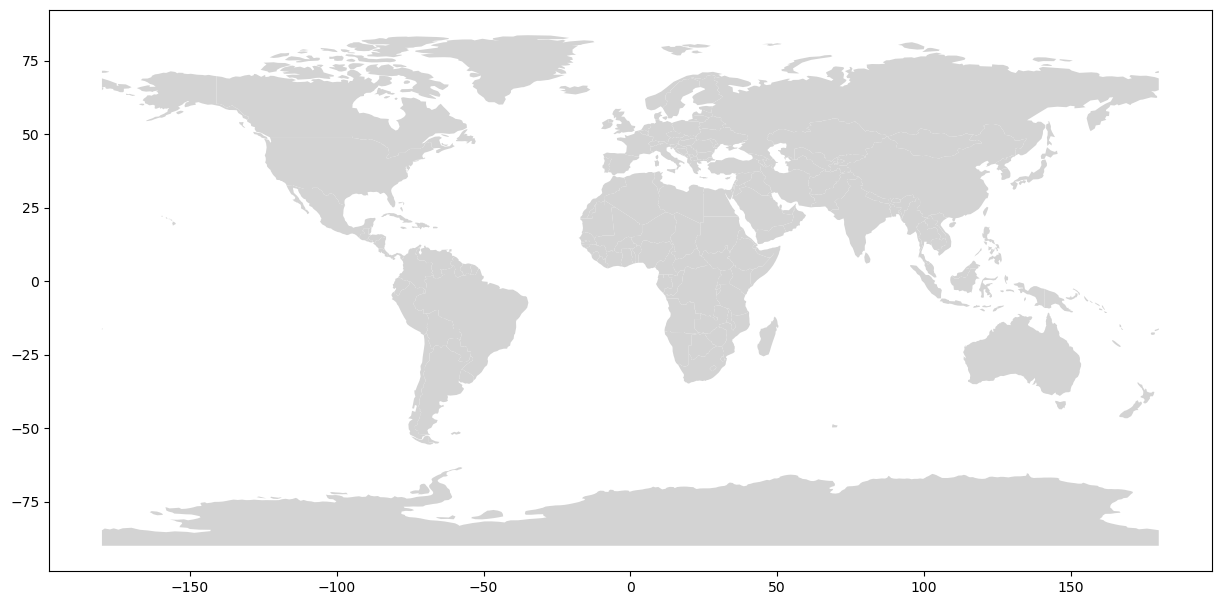

In [1659]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot base map

# Ensure correct column name is used
column_name = 'listeners'  # Replace with your actual column name

if column_name in merged.columns:
    merged.plot(ax=ax, column=column_name, legend=True,
                legend_kwds={'label': "Listeners by Country",
                             'orientation': "horizontal"},
                cmap='Viridis')
else:
    print(f"Column '{column_name}' does not exist in the merged GeoDataFrame.")

plt.title('Listeners by Country for Selected Tags')
plt.show()

In [1579]:
geo_lastfm_mb[geo_lastfm_mb["tags_lastfm"] == 'britpop']

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,tags_list,has_tag
142958,7ccb8e33-359d-461d-9e5a-9db2e624ea77,The Sugarmen,The Sugarmen,NaN,NaN,NaN,britpop,2695.0,3055.0,False,[],False
268970,7a5f40e3-0ece-4b5f-95a6-dd655b753652,The Cheshire Chord Company,The Cheshire Chord Company,NaN,NaN,NaN,britpop,663.0,2770.0,False,[],False
579512,faa2282d-9993-48ef-acb8-d51ecf6a1fc1,Amber Souls,Amber Souls,NaN,NaN,NaN,britpop,48.0,1341.0,False,[],False


In [1517]:
'pop' in geo_lastfm_mb['tags_list']

False

In [1419]:
for g in geo_lastfm_mb:
    if g['country_mb'] == "United States":
        print(g['artist_mb'])
    #geo_lastfm_mb['country_mb' == 'United States']

TypeError: string indices must be integers, not 'str'

In [1471]:
lastfm_mb_df = geo_lastfm_mb[['artist_lastfm', 'country_lastfm', 'listeners_lastfm']].dropna()

In [1473]:
"Singapore" in lastfm_mb_df

False

In [1475]:
len(lastfm_mb_df)

204417

In [1489]:
lastfm_mb_df

,artist_lastfm,country_lastfm,listeners_lastfm
0,Coldplay,United Kingdom,5381567.0
1,Radiohead,United Kingdom,4732528.0
2,Red Hot Chili Peppers,United States,4620835.0
3,Rihanna,Barbados; United States,4558193.0
4,Eminem,United States,4517997.0
...,...,...,...
985886,アップアップガールズ（仮）,Japan,0.0
986084,ヴィドール,Germany; Japan,0.0
986186,吴奇隆,China,0.0
986431,欧陽菲菲,China; Japan,0.0


In [1491]:
"United Kingdom" in lastfm_mb_df.loc[:, "country_lastfm"]

False

In [1579]:
geo_lastfm_mb[geo_lastfm_mb["tags_lastfm"] == 'britpop']

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,tags_list,has_tag
142958,7ccb8e33-359d-461d-9e5a-9db2e624ea77,The Sugarmen,The Sugarmen,NaN,NaN,NaN,britpop,2695.0,3055.0,False,[],False
268970,7a5f40e3-0ece-4b5f-95a6-dd655b753652,The Cheshire Chord Company,The Cheshire Chord Company,NaN,NaN,NaN,britpop,663.0,2770.0,False,[],False
579512,faa2282d-9993-48ef-acb8-d51ecf6a1fc1,Amber Souls,Amber Souls,NaN,NaN,NaN,britpop,48.0,1341.0,False,[],False


In [1493]:
lastfm_mb_df[lastfm_mb_df['country_lastfm'] == 'United Kingdom']

,artist_lastfm,country_lastfm,listeners_lastfm
0,Coldplay,United Kingdom,5381567.0
1,Radiohead,United Kingdom,4732528.0
8,Muse,United Kingdom,4089612.0
9,Queen,United Kingdom,4023379.0
13,The Rolling Stones,United Kingdom,3798330.0
...,...,...,...
983889,Virgil And The Accelerators,United Kingdom,0.0
984098,Wallflowers,United Kingdom,0.0
984257,White Law,United Kingdom,0.0
984835,brakesbrakesbrakes,United Kingdom,0.0


In [1505]:
#lastfm_mb_df.loc[:,"country_lastfm"]
for artist in (lastfm_mb_df[lastfm_mb_df['country_lastfm'] == 'France'])["artist_lastfm"]:
    print(artist)
#for g in range(0, len(lastfm_mb_df)):
#    if(lastfm_mb_df.loc[:,"country_lastfm"][g] == "United Kingdom"):
#        print(lastfm_mb_df.loc[:, "artist_lastfm"][g])
#for g in lastfm_mb_df.loc[:,"country_mb"]:
#   if g == "United States":
#        print(g)

Daft Punk
David Guetta
Air
M83
Justice
Yann Tiersen
Nouvelle Vague
Claude Debussy
Bob Sinclar
Kavinsky
Martin Solveig
Erik Satie
Édith Piaf
St. Germain
Yelle
DJ Snake
Mr. Oizo
Sébastien Tellier
Maurice Ravel
Cassius
Camille Saint-Saëns
Alexandre Desplat
Serge Gainsbourg
Era
Charlotte Gainsbourg
Jean Michel Jarre
Gabriel Fauré
Wax Tailor
Georges Bizet
Kid Loco
Madeon
Françoise Hardy
DJ Cam
Modjo
The Dø
Gojira
Stardust
Deep Forest
Lilly Wood & The Prick
Breakbot
Camille
The Teenagers
Klingande
Zaz
Caravan Palace
Noir Désir
Hector Berlioz
C2C
Laurent Wolf
Yuksek
Vanessa Paradis
Brigitte Bardot
Busy P
DJ Mehdi
Surkin
Gesaffelstein
France Gall
Birdy Nam Nam
Alizée
The Toxic Avenger
Alex Gopher
Thomas Bangalter
Étienne de Crécy
Laurent Garnier
Stéphane Pompougnac
Black Strobe
Melody's Echo Chamber
Faul & Wad Ad
Christine and the Queens
Alcest
Tryo
Jules Massenet
Georges Brassens
Sylvain Chauveau
Tahiti 80
Onra
Pakito
Charles Trenet
Olivier Messiaen
Cocoon
Para One
Jacques Dutronc
Yves Montan